<a href="https://colab.research.google.com/github/pdhruv93/FingerCount-CNN/blob/master/FingerCount_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/pdhruv93/FingerCount-CNN.git

Cloning into 'FingerCount-CNN'...
remote: Enumerating objects: 12733, done.
remote: Counting objects: 100% (12733/12733), done.
remote: Compressing objects: 100% (12731/12731), done.
remote: Total 12733 (delta 0), reused 12730 (delta 0), pack-reused 0
Receiving objects: 100% (12733/12733), 32.38 MiB | 9.28 MiB/s, done.


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential, load_model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [0]:
#Data Augmentation
#rescale--Normalisig the image. Defaults to None. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided (after applying all other transformations).
#horizontal_flip--Randomly flip inputs horizontally. for Mirroring. Mirroring will help to ensure that the data are not biased to a particular handedness.
train_datagen = ImageDataGenerator(rescale=1/255,rotation_range=10.,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,horizontal_flip=True)
test_datagen  = ImageDataGenerator( rescale=1/255 )

In [0]:
nbatch = 128
#ImageDataGenerator--Instead of loading all images into memory, it will load just enough images into memory
#Goto this link for better understanding of how to load images from folders:
#https://machinelearningmastery.com/how-to-load-large-datasets-from-directories-for-deep-learning-with-keras/
train_iterator = train_datagen.flow_from_directory('FingerCount-CNN/images/train/',target_size=(300, 300),color_mode='grayscale',batch_size=nbatch,class_mode='categorical')
test_iterator = test_datagen.flow_from_directory('FingerCount-CNN/images/test/',target_size=(300, 300),color_mode='grayscale',batch_size=nbatch,class_mode='categorical')


Found 9081 images belonging to 6 classes.
Found 3632 images belonging to 6 classes.


In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(300,300,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 128)       0         


In [0]:
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['acc'])

In [0]:
callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='FingerCountCheckpoint.h5', monitor='val_loss', save_best_only=True),
]

#EarlyStopping--Stop training when a monitored quantity has stopped improving.
#monitor: quantity to be monitored.
#patience: number of epochs that produced the monitored quantity with no improvement after which training will be stopped.

In [0]:
 history = model.fit_generator(train_iterator,steps_per_epoch=71,epochs=40,validation_data=test_iterator,validation_steps=28,callbacks=callbacks_list)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/40
71/71 [==============================] - 91s 1s/step - loss: 1.6501 - acc: 0.2938 - val_loss: 1.1084 - val_acc: 0.5223
Epoch 2/40
71/71 [==============================] - 83s 1s/step - loss: 1.0481 - acc: 0.5729 - val_loss: 0.6283 - val_acc: 0.7123
Epoch 3/40
71/71 [==============================] - 83s 1s/step - loss: 0.5984 - acc: 0.7679 - val_loss: 0.1703 - val_acc: 0.9372
Epoch 4/40
71/71 [==============================] - 83s 1s/step - loss: 0.3771 - acc: 0.8560 - val_loss: 0.2358 - val_acc: 0.8975
Epoch 5/40
71/71 [==============================] - 83s 1s/step - loss: 0.2656 - acc: 0.9010 - val_loss: 0.0814 - val_acc: 0.9683
Epoch 6/40
71/71 [==============================] - 83s 1s/step - loss: 0.1738 - acc: 0.9393 - val_loss: 0.0290 - val_acc: 0.9926
Epoch 7/40
71/71 [==============================] - 83s 1s/step - loss: 0.1388 - acc: 0.9508 - val_loss: 0.0511 - val_acc: 0.9

Text(0.5, 0, '# of epochs')

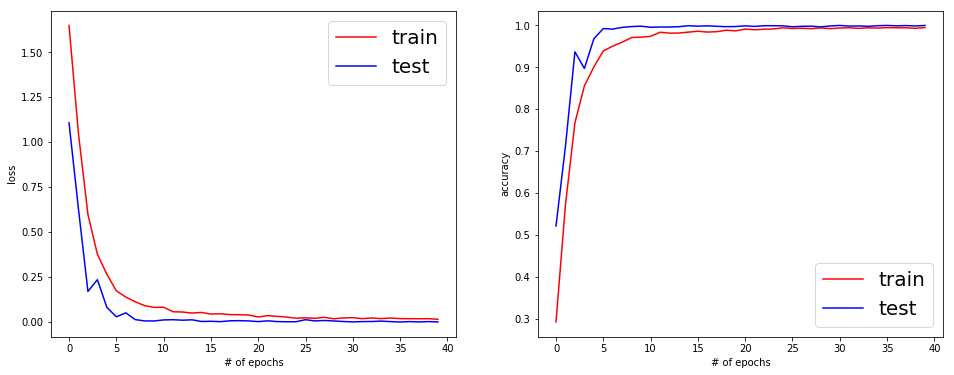

In [0]:
#plotting graphs
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
nepochs=len(history.history['loss'])
plt.plot(range(nepochs), history.history['loss'],     'r-', label='train')
plt.plot(range(nepochs), history.history['val_loss'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('loss')
plt.xlabel('# of epochs')
plt.subplot(1,2,2)
plt.plot(range(nepochs), history.history['acc'],     'r-', label='train')
plt.plot(range(nepochs), history.history['val_acc'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('accuracy')
plt.xlabel('# of epochs')